In [1]:
!pip install PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.4 MB/s eta 0:00:00


                    Area  Score
0      Quality/Six Sigma      7
1  Operations management      4
3     Project management      4
5             Healthcare      4
4         Data analytics      2
2           Supply chain      0


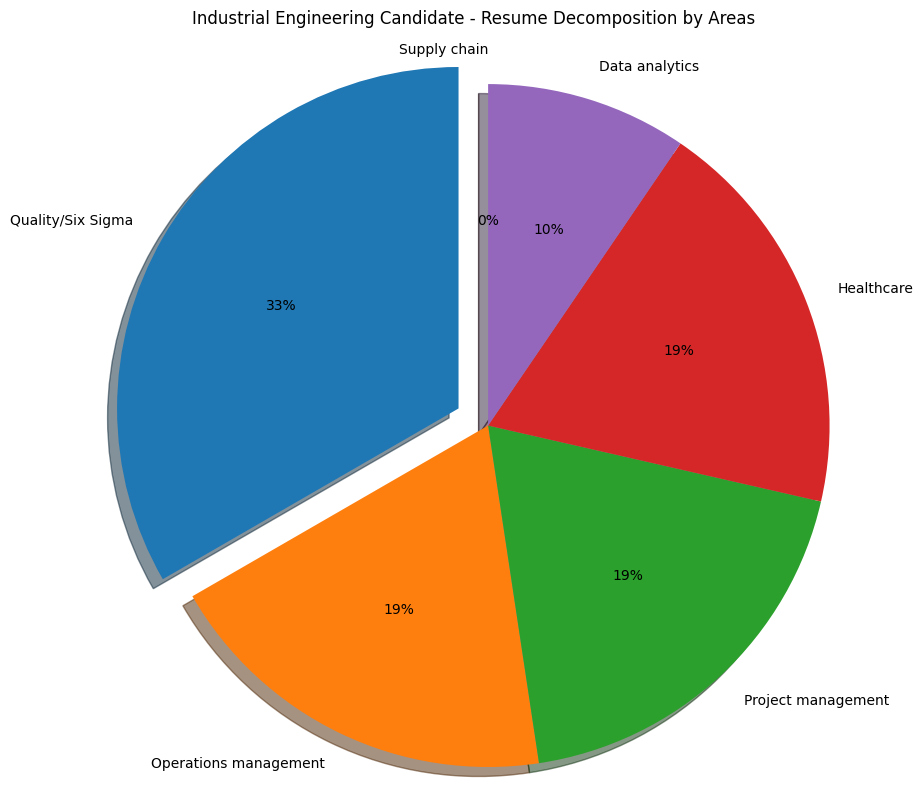

In [1]:

import PyPDF2
import re
import string
import pandas as pd
import matplotlib.pyplot as plt

try:
    pdfFileObj = open('/content/Cover_Letter.pdf', 'rb')
except FileNotFoundError:
    print("File not found. Please check the file path and name.")
    exit()

pdfReader = PyPDF2.PdfReader(pdfFileObj)
num_pages = len(pdfReader.pages)

# Initialize a count for the number of pages
count = 0

text = ""

while count < num_pages:
    pageObj = pdfReader.pages[count]
    count += 1
    text += pageObj.extract_text()

text = text.lower()

text = re.sub(r'\d+', '', text)

text = text.translate(str.maketrans('', '', string.punctuation))

terms = {
    'Quality/Six Sigma': ['black belt', 'capability analysis', 'control charts', 'doe', 'dmaic', 'fishbone',
                          'gage r&r', 'green belt', 'ishikawa', 'iso', 'kaizen', 'kpi', 'lean', 'metrics',
                          'pdsa', 'performance improvement', 'process improvement', 'quality',
                          'quality circles', 'quality tools', 'root cause', 'six sigma',
                          'stability analysis', 'statistical analysis', 'tqm'],
    'Operations management': ['automation', 'bottleneck', 'constraints', 'cycle time', 'efficiency', 'fmea',
                              'machinery', 'maintenance', 'manufacture', 'line balancing', 'oee', 'operations',
                              'operations research', 'optimization', 'overall equipment effectiveness',
                              'pfmea', 'process', 'process mapping', 'production', 'resources', 'safety',
                              'stoppage', 'value stream mapping', 'utilization'],
    'Supply chain': ['abc analysis', 'apics', 'customer', 'customs', 'delivery', 'distribution', 'eoq', 'epq',
                     'fleet', 'forecast', 'inventory', 'logistic', 'materials', 'outsourcing', 'procurement',
                     'reorder point', 'rout', 'safety stock', 'scheduling', 'shipping', 'stock', 'suppliers',
                     'third party logistics', 'transport', 'transportation', 'traffic', 'supply chain',
                     'vendor', 'warehouse', 'wip', 'work in progress'],
    'Project management': ['administration', 'agile', 'budget', 'cost', 'direction', 'feasibility analysis',
                           'finance', 'kanban', 'leader', 'leadership', 'management', 'milestones', 'planning',
                           'pmi', 'pmp', 'problem', 'project', 'risk', 'schedule', 'scrum', 'stakeholders'],
    'Data analytics': ['analytics', 'api', 'aws', 'big data', 'business intelligence', 'clustering', 'code',
                       'coding', 'data', 'database', 'data mining', 'data science', 'deep learning', 'hadoop',
                       'hypothesis test', 'iot', 'internet', 'machine learning', 'modeling', 'nosql', 'nlp',
                       'predictive', 'programming', 'python', 'r', 'sql', 'tableau', 'text mining',
                       'visualization'],
    'Healthcare': ['adverse events', 'care', 'clinic', 'cphq', 'ergonomics', 'healthcare',
                   'health care', 'health', 'hospital', 'human factors', 'medical', 'near misses',
                   'patient', 'reporting system']
}


scores = {key: 0 for key in terms.keys()}


for area, keywords in terms.items():
    for word in keywords:
        if word in text:
            scores[area] += 1


summary = pd.DataFrame(scores.items(), columns=['Area', 'Score']).sort_values(by='Score', ascending=False)
print(summary)

pie = plt.figure(figsize=(10, 10))
plt.pie(summary['Score'], labels=summary['Area'], explode=(0.1, 0, 0, 0, 0, 0), autopct='%1.0f%%', shadow=True, startangle=90)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

pie.savefig('resume_screening_results.png')
